*** !pip install transformers for installing hugging face library ***

In [1]:
!pip install --quiet transformers
!pip install --quiet sentencepiece
!pip install --quiet textwrap3
!pip install --quiet nltk

     |████████████████████████████████| 4.9 MB 41.2 MB/s 
     |████████████████████████████████| 163 kB 57.2 MB/s 
     |████████████████████████████████| 6.6 MB 26.3 MB/s 
     |████████████████████████████████| 1.3 MB 31.4 MB/s 


In [2]:
text = """Elon Musk has shown again he can influence the digital currency market with just his tweets. After saying that his electric vehicle-making company
 Tesla will not accept payments in Bitcoin because of environmental concerns, he tweeted that he was working with developers of Dogecoin to improve
 system transaction efficiency. Following the two distinct statements from him, the world's largest cryptocurrency hit a two-month low, while Dogecoin
 rallied by about 20 percent. The SpaceX CEO has in recent months often tweeted in support of Dogecoin, but rarely for Bitcoin.  In a recent tweet,
 Musk put out a statement from Tesla that it was “concerned” about the rapidly increasing use of fossil fuels for Bitcoin (price in India) mining and
 transaction, and hence was suspending vehicle purchases using the cryptocurrency.  A day later he again tweeted saying, “To be clear, I strongly
 believe in crypto, but it can't drive a massive increase in fossil fuel use, especially coal”.  It triggered a downward spiral for Bitcoin value but
 the cryptocurrency has stabilised since.   A number of Twitter users welcomed Musk's statement. One of them said it's time people started realising
 that Dogecoin “is here to stay” and another referred to Musk's previous assertion that crypto could become the world's future currency."""


In [3]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config
from textwrap3 import wrap

# TOKENIZERS

Before you can use your data in a model, the data needs to be processed into an acceptable format for the model. A model does not understand raw text, images or audio. These inputs need to be converted into numbers and assembled into tensors. In this tutorial, you will:

* Preprocess textual data with a tokenizer.
* Preprocess image or audio data with a feature extractor.
* Preprocess data for a multimodal task with a processor.

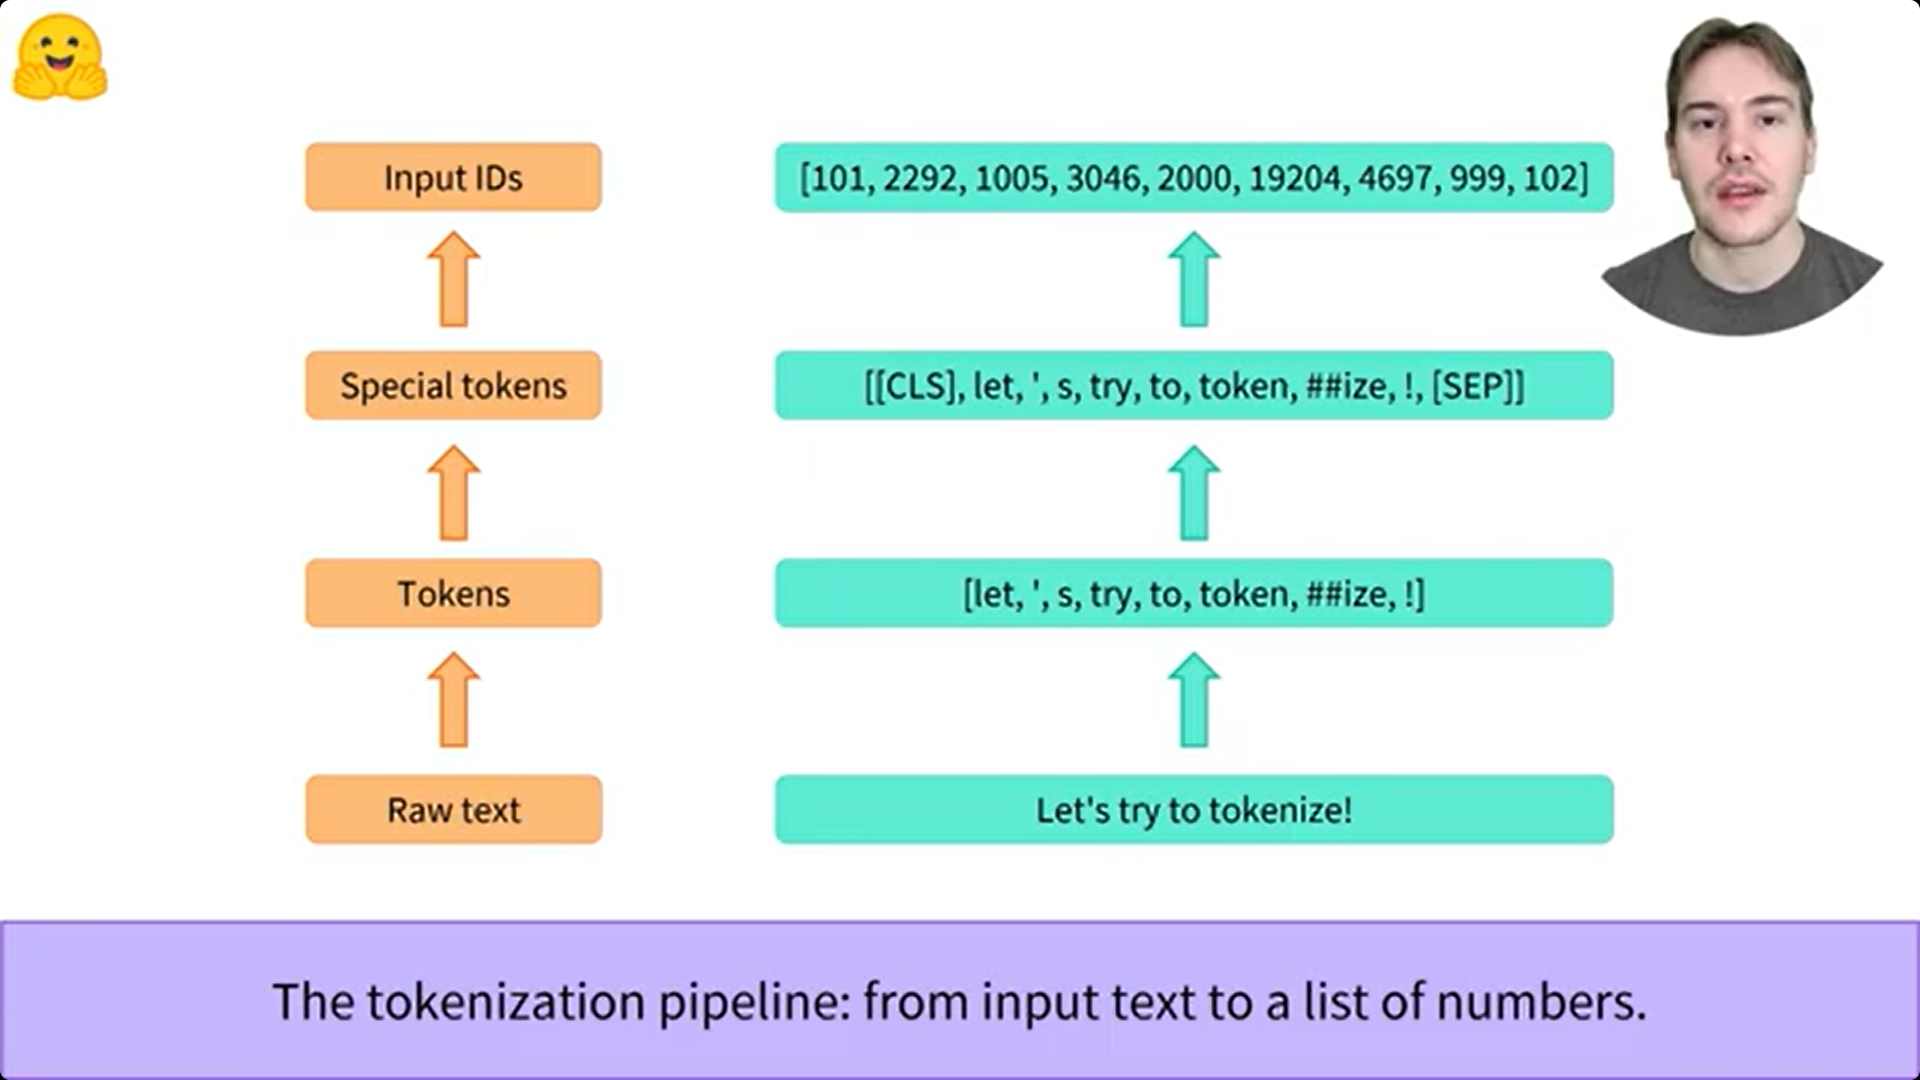

* A tokenizer starts by splitting text into tokens according to a set of rules. The tokens are converted into numbers, which are used to build tensors as input to a model. Any additional inputs required by a model are also added by the tokenizer.
* the tokenizer added two special tokens - CLS and SEP (classifier and separator) - to the sentence. Not all models need special tokens, but if they do, the tokenizer will automatically add them for you.

* The tokenizer returns a dictionary with three important items:
  * ***input_ids*** are the indices corresponding to each token in the sentence.
  * ***attention_mask*** indicates whether a token should be attended to or not.
  * **token_type_ids** identifies which sequence a token belongs to when there is more than one sequence.
* You can decode the input_ids to return the original input:---tokenizer.decode---




*  Tokenizer documentation : https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizer.encode

In [4]:
model = T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer = T5Tokenizer.from_pretrained('t5-base')

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5.py:174: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,



* encode_plus utilities--
   https://huggingface.co/docs/transformers/v4.21.1/en/internal/tokenization_utils#transformers.PreTrainedTokenizerBase.encode_plus






In [5]:
import nltk
nltk.download('punkt')
nltk.download('brown')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.tokenize import sent_tokenize

def postprocesstext (content):
  final=""
  for sent in sent_tokenize(content):
    sent = sent.capitalize()
    final = final +" "+sent
  return final


def summarizer(text,model,tokenizer):
  text = text.strip().replace("\n"," ")
  text = "summarize: "+text
  # print (text)
  max_len = 512
  encoding = tokenizer.encode_plus(text,max_length=max_len, pad_to_max_length=False,truncation=True, return_tensors="pt")
  
  input_ids, attention_mask = encoding["input_ids"], encoding["attention_mask"]

  # The attention mask is a binary tensor indicating the position of the padded indices so that the model does not attend to them. 
  # For the BertTokenizer, 1 indicates a value that should be attended to, while 0 indicates a padded value.
  
  outs = model.generate(input_ids=input_ids,
                                  attention_mask=attention_mask,
                                  early_stopping=True,
                                  num_beams=3,
                                  num_return_sequences=1,
                                  no_repeat_ngram_size=2,
                                  min_length = 75,
                                  max_length=300)


  dec = [tokenizer.decode(ids,skip_special_tokens=True) for ids in outs]
  summary = dec[0]
  summary = postprocesstext(summary)
  summary= summary.strip()

  return summary


summarized_text = summarizer(text,model,tokenizer)


print ("\noriginal Text >>")
for wrp in wrap(text, 150):
  print (wrp)
print ("\n")
print ("Summarized Text >>")
for wrp in wrap(summarized_text, 150):
  print (wrp)
print ("\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...



original Text >>
Elon Musk has shown again he can influence the digital currency market with just his tweets. After saying that his electric vehicle-making company
Tesla will not accept payments in Bitcoin because of environmental concerns, he tweeted that he was working with developers of Dogecoin to improve
system transaction efficiency. Following the two distinct statements from him, the world's largest cryptocurrency hit a two-month low, while Dogecoin
rallied by about 20 percent. The SpaceX CEO has in recent months often tweeted in support of Dogecoin, but rarely for Bitcoin.  In a recent tweet,
Musk put out a statement from Tesla that it was “concerned” about the rapidly increasing use of fossil fuels for Bitcoin (price in India) mining and
transaction, and hence was suspending vehicle purchases using the cryptocurrency.  A day later he again tweeted saying, “To be clear, I strongly
believe in crypto, but it can't drive a massive increase in fossil fuel use, especially coal”.  I